# **The Data Cleaning Process**

## Import Libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Remove irrelevant data


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# The PassengerId feature a unqiue ID for 
# the Passenger and so can be removed

df = df.drop("PassengerId", axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# The Ticket feature can also be removed
df = df.drop("Ticket", axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [8]:
# confimed and make sure all the reqired 
# columns have been removed
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

## Deduplicate your data

In [9]:
# check the size of your dataset so you can 
# keep track of any row or datapoint that was removed
df.shape

(891, 10)

In [10]:
# Use the "Name" columns we will like to removed any
# rows with the same Name, that is, we will like to
# remove duplicate from our dataser if any

# sorting by first
df.sort_values("Name", inplace = True)
 
# dropping ALL duplicate values
df.drop_duplicates(subset ="Name",
                     keep = False, inplace = True)

In [11]:
# check the size againt to know 
# if any datapoint was removed
df.shape

(891, 10)

In [12]:
# Since the number of rows in the dataset remained
# the same, therefore the dataset doesnot have any duplicate

## Fix structural errors

In [13]:
# The main of this section is to rename the different 
# class in our categorigal feature that were not properly named.
# or chanage the data type of a column

cat_features = {
    "Sex",
    "Embarked",
    "Pclass"
}

for cat_feature in cat_features:
  print(df[cat_feature].unique())

['male' 'female']
[3 2 1]
['S' 'C' 'Q' nan]


## Deal with missing data

In [14]:
# Firstky we idenity the colunms with
# missing values and their count

df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
# Age, Cabin and Embarked all have missing values
# Cabin have more than 80% of its values missing so 
# we will have to remove it

df = df.drop("Cabin", axis=1)

In [16]:
# For Embarked we can replace the Nan value with the
# most frequently occuring class in that feature
mode_value = df["Embarked"].mode()[0]
print(mode_value)

df["Embarked"].fillna(mode_value, inplace=True)

S


In [17]:
# For Age we can replace the missing value with the mean Age
mean_value = df["Age"].mean()
print(mean_value)

df["Age"].fillna(mean_value, inplace=True)

29.69911764705882


## Filter out data outliers

/Users/abdul-azeez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


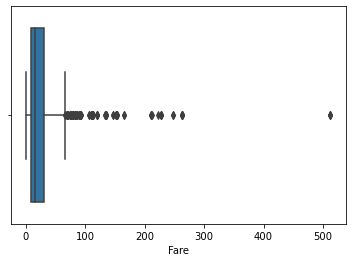

In [20]:
# Using the Box plot we can check our dataset
# to know if we have any outliers
# We are checking the Fare column to see if
# any of the prices are expectional higher than
# the rest 

import seaborn as sns
sns.boxplot(df['Fare']);

In [19]:
#TODO: Remove the outlier based on the Fare Column